# EcoFOCIpy ADCP QC - 21BSP-2A

- mostly remove >500 cm/s flows in u/v


In [10]:
import xarray as xa
import numpy as np

import matplotlib.pyplot as plt

from EcoFOCIpy.plots import TimeSeriesStickPlot

In [32]:
xdf = xa.load_dataset('24bsp14a_0026m.trimmed.nc')

In [33]:
len(xdf.depth)

9

/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)
/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)
/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)
/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xtick

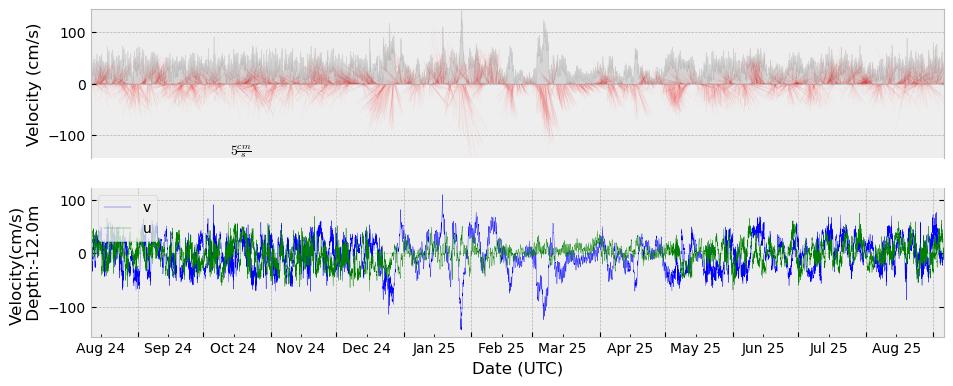

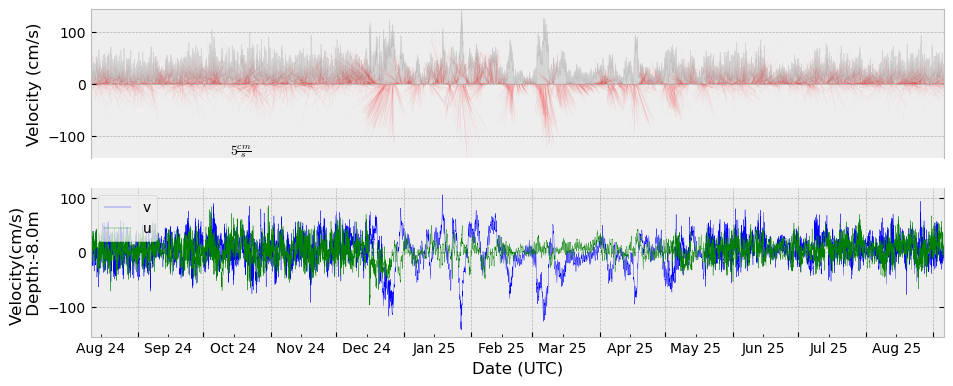

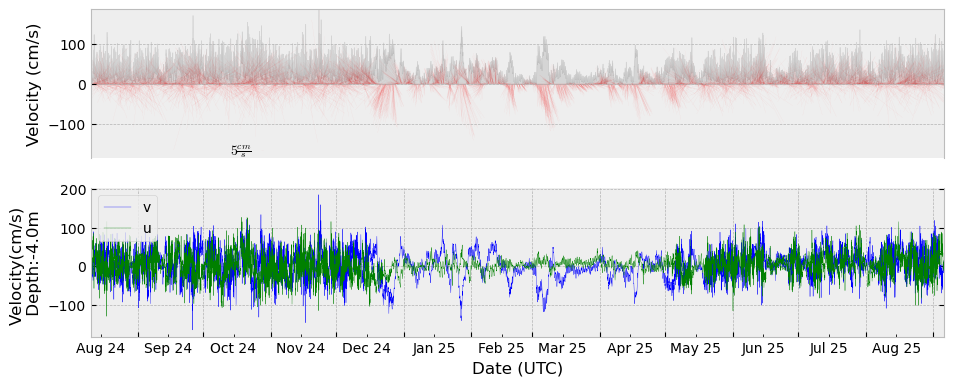

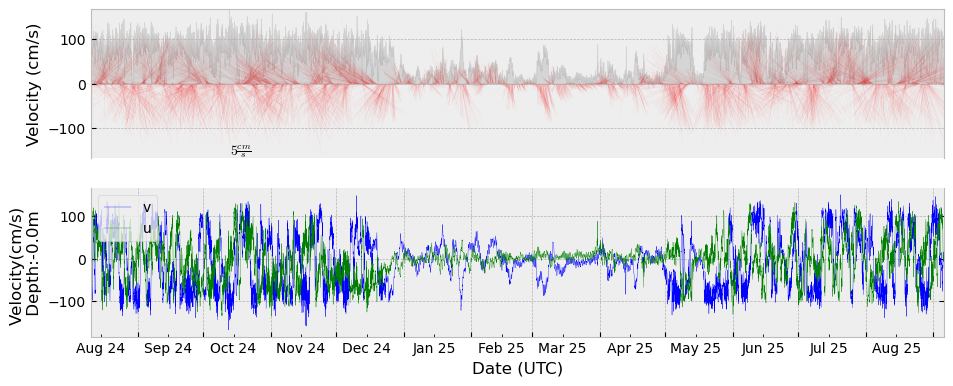

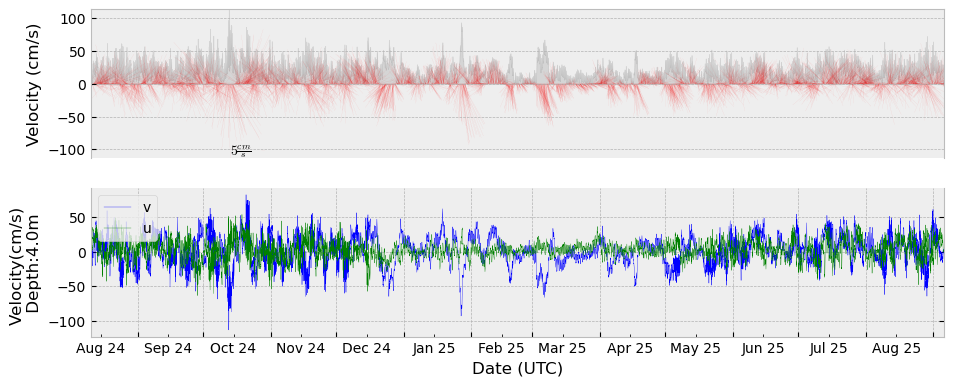

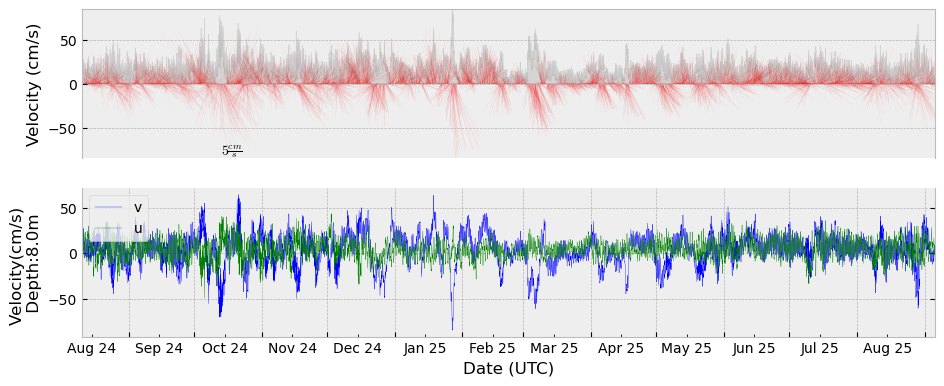

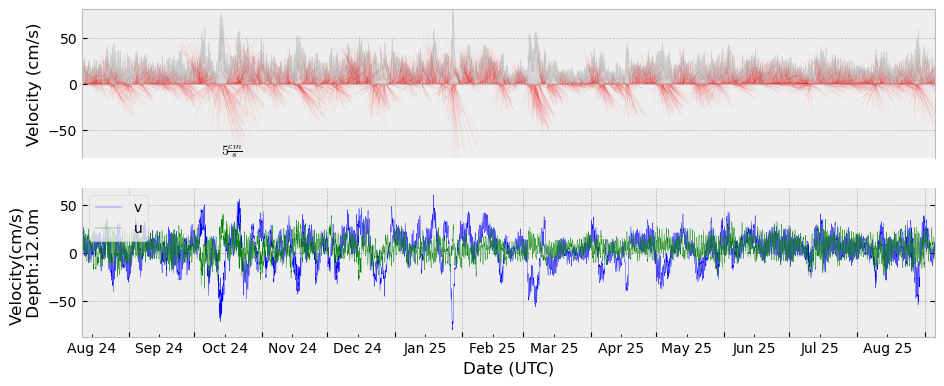

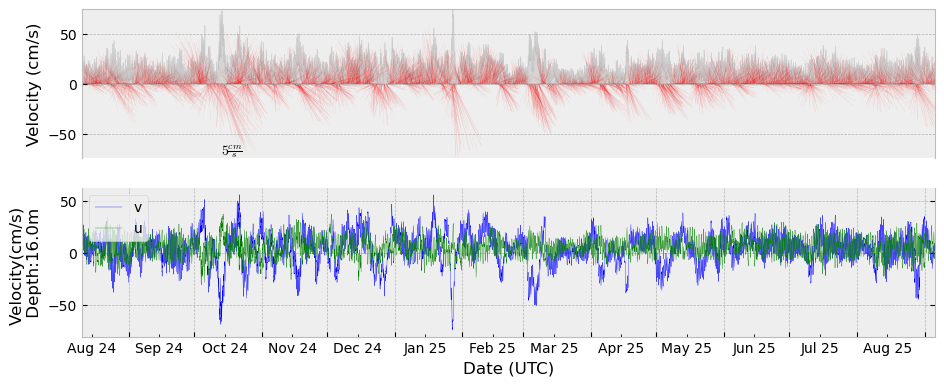

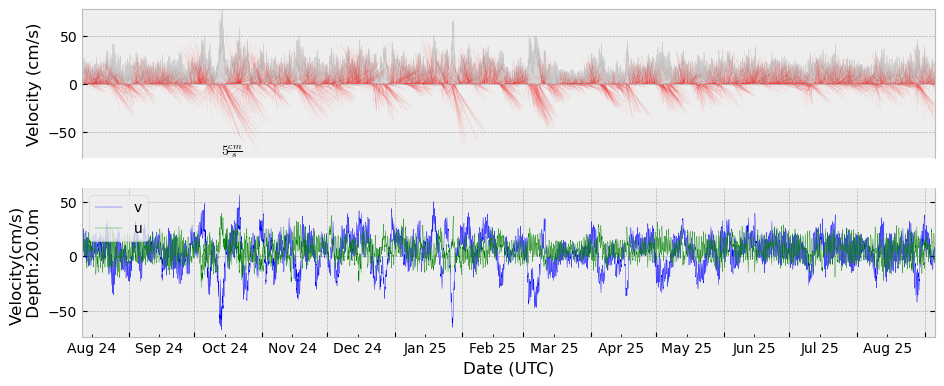

In [37]:
for i in range(0,len(xdf.depth),1):
    try:
        p1 = TimeSeriesStickPlot.Timeseries1dStickPlot()
        plt1, fig1 = p1.plot(timedata=xdf.time, 
                         udata=xdf.isel(depth=i,latitude=0,longitude=0).u_curr_comp, 
                         vdata=xdf.isel(depth=i,latitude=0,longitude=0).v_curr_comp,
                         rotate=0,
                         ylabel = f'Velocity(cm/s) \n {xdf.isel(depth=i).depth.values}m ')
        plt1.ylabel(f'Velocity(cm/s) \n Depth:{xdf.isel(depth=i).depth.values}m ')
    except:
        pass

In [35]:
xdf =xdf.where(np.abs(xdf.u_curr_comp) <=750,np.nan)
xdf

<xarray.Dataset> Size: 5MB
Dimensions:          (latitude: 1, longitude: 1, time: 9385, depth: 9)
Coordinates:
  * time             (time) datetime64[ns] 75kB 2024-08-10T16:00:00 ... 2025-...
  * depth            (depth) float64 72B -12.0 -8.0 -4.0 -0.0 ... 12.0 16.0 20.0
  * latitude         (latitude) float64 8B 64.0
  * longitude        (longitude) float64 8B -167.9
Data variables:
    u_curr_comp      (latitude, longitude, time, depth) float64 676kB -31.58 ...
    v_curr_comp      (latitude, longitude, time, depth) float64 676kB -4.44 ....
    w_curr_comp      (latitude, longitude, time, depth) float64 676kB -0.1 .....
    w_curr_comp_err  (latitude, longitude, time, depth) float64 676kB -0.2 .....
    agc1             (latitude, longitude, time, depth) float64 676kB 107.0 ....
    agc2             (latitude, longitude, time, depth) float64 676kB 108.0 ....
    agc3             (latitude, longitude, time, depth) float64 676kB 109.0 ....
    agc4             (latitude, longitude, time, depth) float64 676kB 117.0 ....
Attributes: (12/13)
    Latitude_DegMMddW:                      64 00.251 N
    Longitude_DegMMddN:                     167 55.150 W
    MooringID:                              24BSP-14A
    platform_deployment_date:               2024-08-10T16:00:00Z
    platform_deployment_cruise_name:        SKQ202412S
    platform_recovery_date:                 2025-09-05T16:00:00Z
    ...                                     ...
    platform_deployment_recovery_comments:  
    WaterDepth:                             42.0
    date_created:                           2025-11-14T08:34:27Z
    date_modified:                          
    QC_indicator:                           unknown
    history:                                Trimmed to deployment.

In [36]:
# xdf['history'] = xdf.history + 'QC of high u/v values'

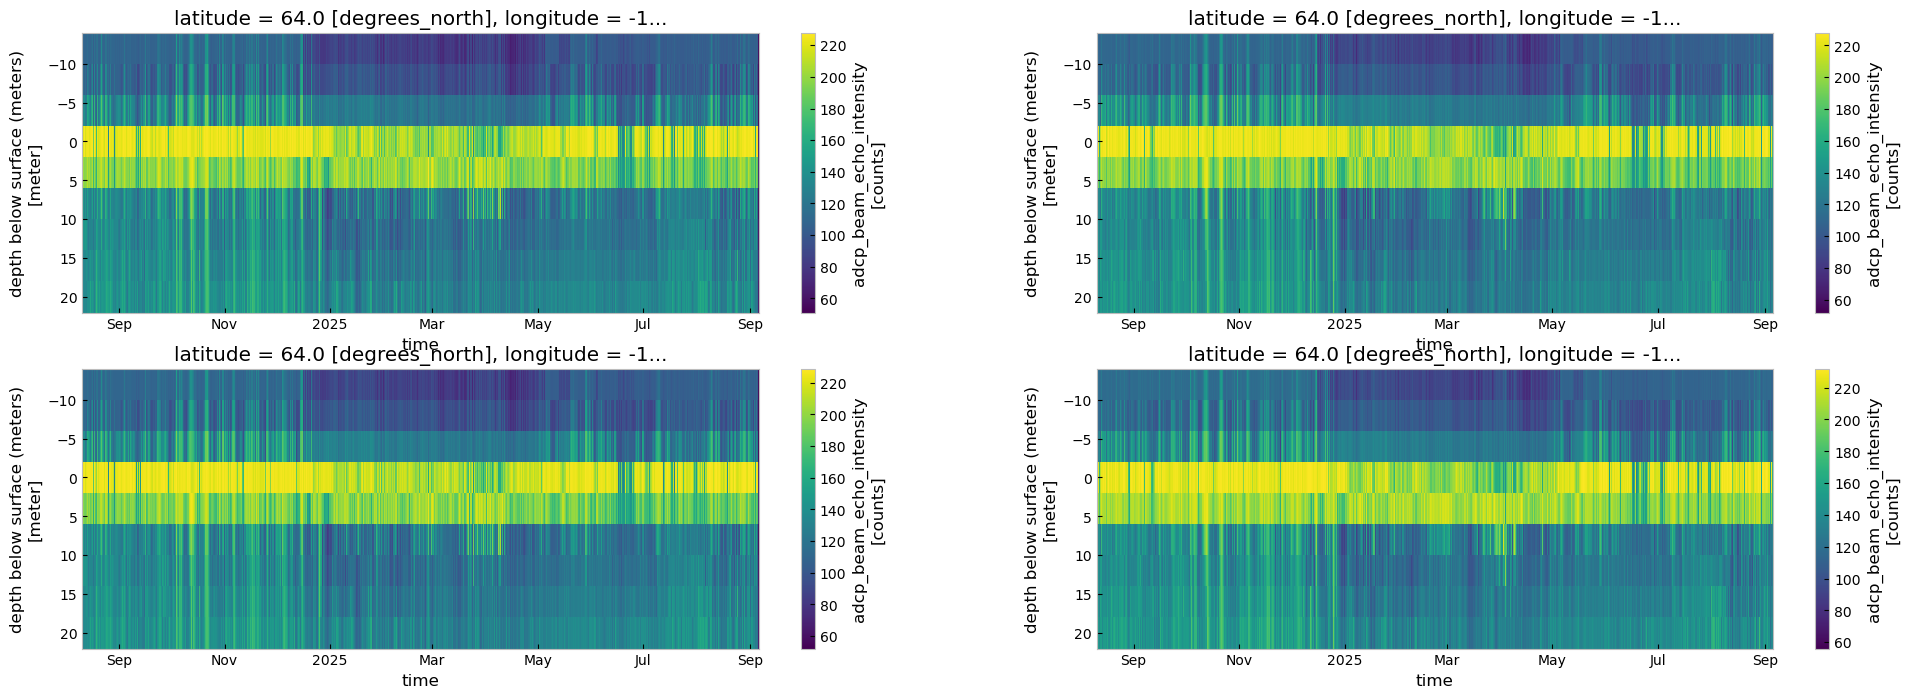

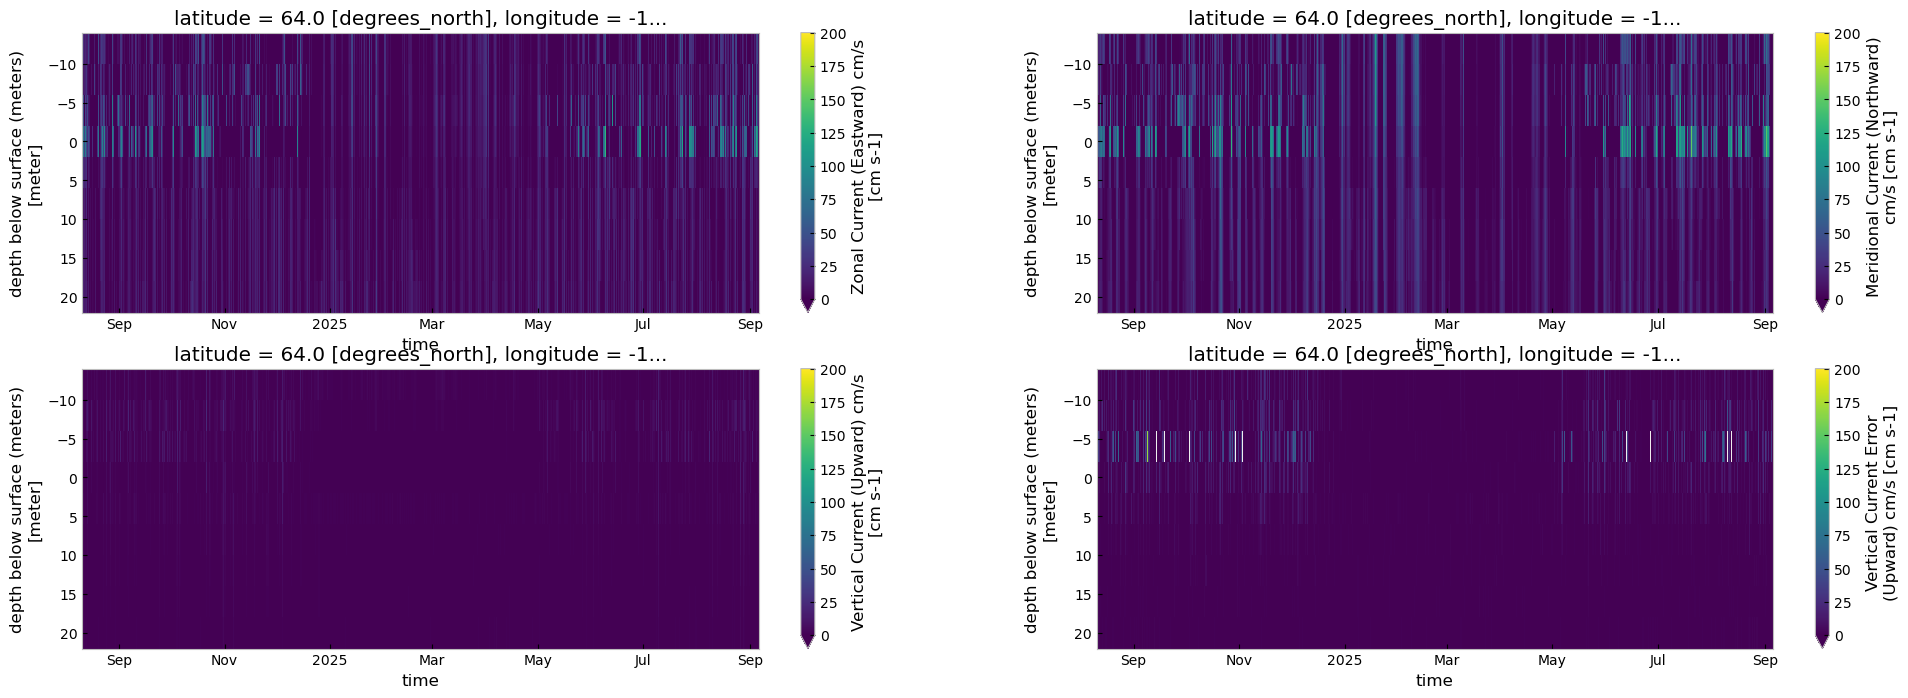

In [38]:
#optional plotting

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    xdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    xdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    xdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    xdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [39]:
try:
    xdf.attrs['history'] = xdf.attrs['history']+'  removed U,V >750cm/s'
except:
    xdf.attrs['history'] = '  removed U,V >750cm/s'    

## Trim above surface (negative values)

In [40]:
ixdf = xdf.where(xdf.depth >=-0.).dropna(how='all',dim='depth')

In [41]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  trimmed above surface'

In [42]:
ixdf.to_netcdf('24bsp14a_0026m.trimmed.nc')

In [43]:
xdf = xa.load_dataset('24bsp14a_0026m.trimmed.nc')

In [44]:
ixdf = xdf.interpolate_na(dim='time',max_gap='2h')

In [45]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  linearly interpolated 1hour gaps'

In [46]:
ixdf = ixdf.interpolate_na(dim='depth',max_gap=3)

In [47]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  linearly interpolated 2 vertical bin'

## Interpolate over singleton missing gaps linearly

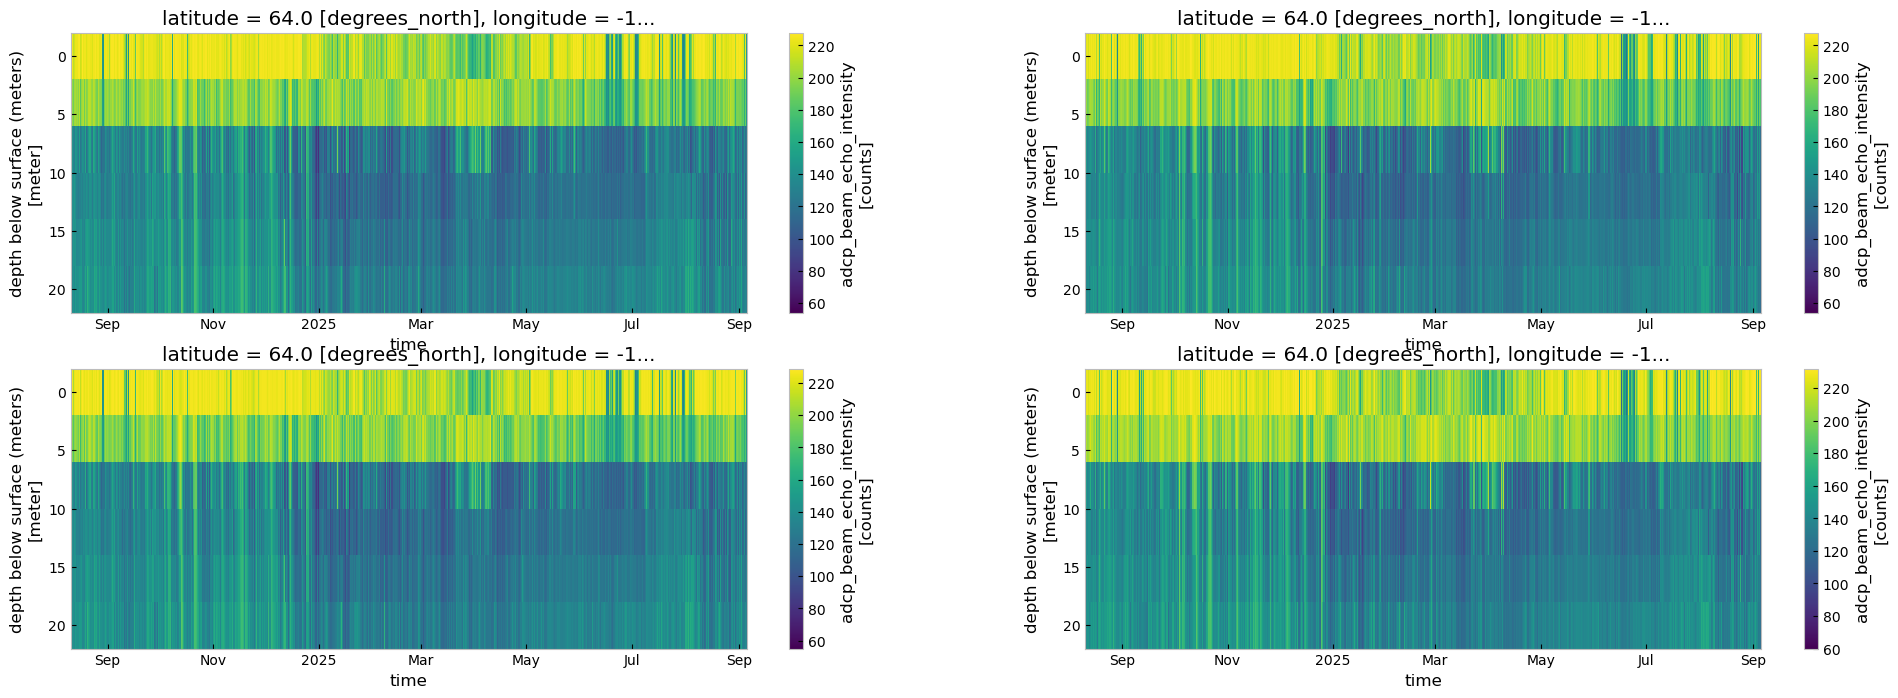

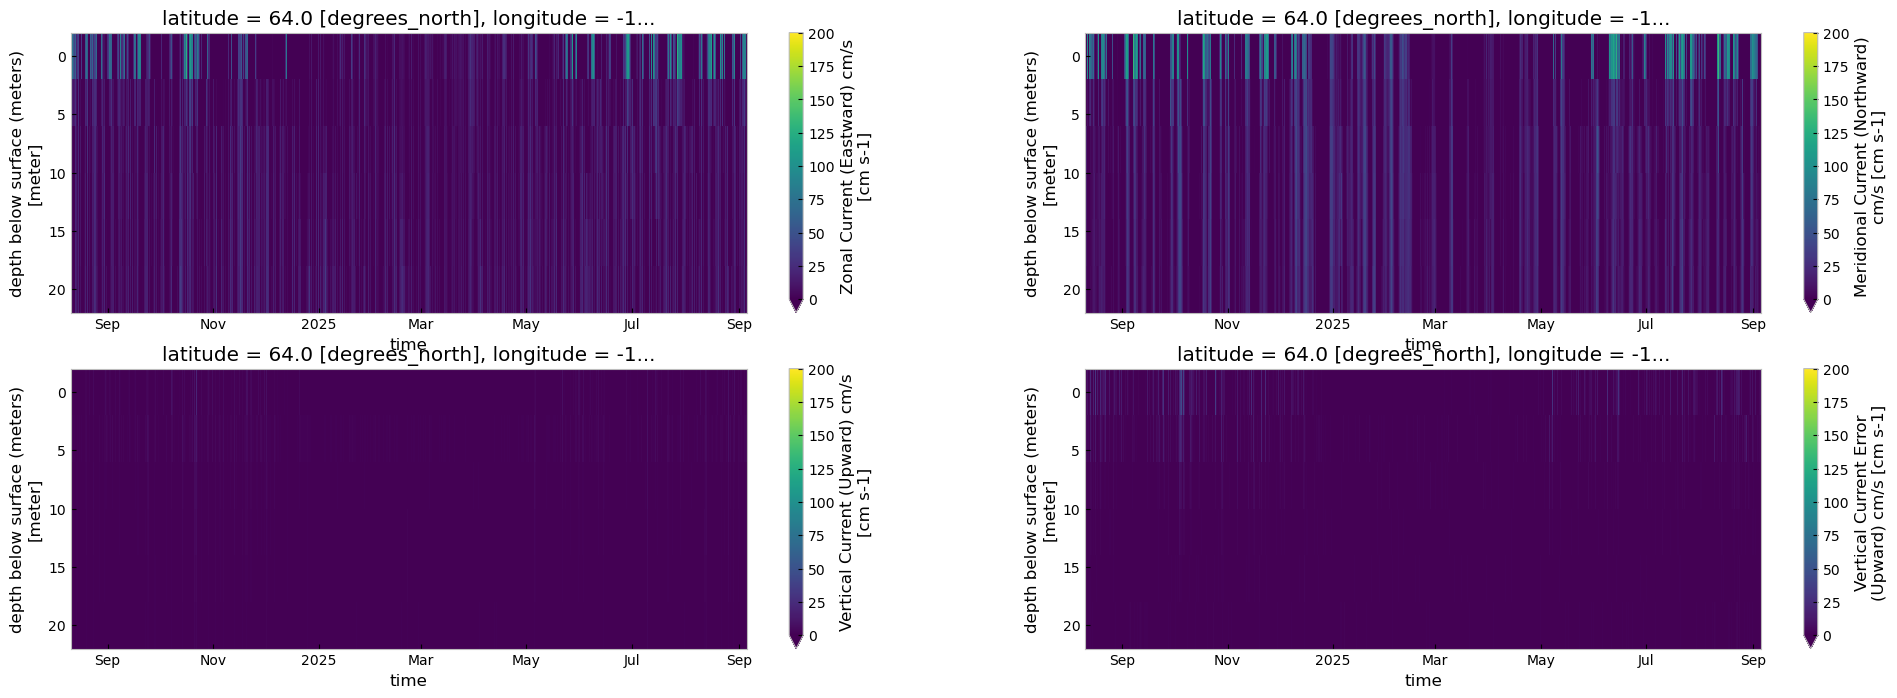

In [48]:

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    ixdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    ixdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    ixdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    ixdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [49]:
ixdf.to_netcdf('24bsp14a_0026m.filtered.nc')